### Set Up Birthright

In [1]:
from source.regency import Regency

Game = Regency('new')

Using TensorFlow backend.


In [2]:
Region = 'Eastern Marches'

domain='Coeranys'
Game.add_regent('EC', 'Eluvie Cariele', Class='Fighter', Alignment='CG', Regency_Bonus=2
                     , Attitude='Peaceful', Lieutenants=['Aedric Bherenstae'])
Game.add_regent('LPA', 'Life and Protection of Avanalae (Medhlorie Haensen)', Archetype='Priest', Regency_Bonus=3)
Game.add_regent('GH', 'Ghorien Hiriele (Highland/Overland Traders)')
Game.add_regent('Sw2', 'Second Swamp Mage', Archetype='Hag')
Game.add_regent('HA', "Haelyn's Aegis (Anita Maricoere)", Archetype='Priest')
Game.add_regent('DW', "Diirk Watersold (Royal Guild of Baruk-Azhir)", Class='Rogue', Alignment='NG', Race='Dwarf')
Game.add_regent('TBM', "Three Brother Mages", Archetype='Mage')
Game.add_regent('EL', "Elamien Lamier (Points East Trading Guild)")

Game.add_relationship('LPA', 'EC', Diplomacy=3, Vassalage=1)

p = 'Bogsend'
Game.add_provence(p, domain, Region, 'EC', 1543, 1985, Population=3, Magic=2, Terrain='Swamp')
Game.add_holding(p, 'EC', 'Law', 1)
Game.add_holding(p, 'LPA', 'Temple', 1)
Game.add_holding(p, 'GH', 'Guild', 3)
Game.add_holding(p, 'Sw2', 'Source', 2)


p = 'Caudraight'
Game.add_provence(p, domain, Region, 'EC', 1556, 1914, Population=4, Magic=1)
Game.add_holding(p, 'EC', 'Law', 2)
Game.add_holding(p, 'LPA', 'Temple', 2)
Game.add_holding(p, 'HA', 'Temple', 2)
Game.add_holding(p, 'DW', 'Guild', 2)
Game.add_holding(p, 'GH', 'Guild', 2)

p = 'Deepshadow'
Game.add_provence(p, domain, Region, 'EC', 1550, 1828, Population=3, Magic=2)
Game.add_holding(p, 'EC', 'Law', 2)
Game.add_holding(p, 'LPA', 'Temple', 2)
Game.add_holding(p, 'DW', 'Guild', 3)
Game.add_holding(p, 'TBM', 'Source', 3)

p = 'Duornil'
Game.add_provence(p, domain, Region, 'EC', 1606, 1837, Population=2, Magic=3)
Game.add_holding(p, 'EC', 'Law', 2)
Game.add_holding(p, 'LPA', 'Temple', 1)
Game.add_holding(p, 'DW', 'Guild', 3)
Game.add_holding(p, 'TBM', 'Source', 2)

p = 'Mistil'
Game.add_provence(p, domain, Region, 'EC', 1662, 1966, Population=2, Magic=3, Waterway=True)
Game.add_holding(p, 'EC', 'Law', 1)
Game.add_holding(p, 'LPA', 'Temple', 2)
Game.add_holding(p, 'DW', 'Guild', 2)
Game.add_holding(p, 'TBM', 'Source', 3)

p = 'Ranien'
Game.add_provence(p, domain, Region, 'EC', 1610, 1921, Population=2, Magic=3)
Game.add_holding(p, 'EC', 'Law', 1)
Game.add_holding(p, 'LPA', 'Temple', 1)
Game.add_holding(p, 'DW', 'Guild', 2)
Game.add_holding(p, 'TBM', 'Source', 3)

p = 'Ruorven'
Game.add_provence(p, domain, Region, 'EC', 1610, 2043, Population=4, Magic=1, Terrain='Swamp', Capital=True, Waterway=True)
Game.add_holding(p, 'EC', 'Law', 3)
Game.add_holding(p, 'LPA', 'Temple', 3)
Game.add_holding(p, 'HA', 'Temple', 1)
Game.add_holding(p, 'EL', 'Guild', 2)
Game.add_holding(p, 'DW', 'Guild', 2)

Game.add_geo('Deepshadow', 'Duornil', Border=1)
Game.add_geo('Caudraight', 'Duornil', Border=1)
Game.add_geo('Deepshadow', 'Caudraight', Border=1)
Game.add_geo('Caudraight', 'Ranien', Border=1)
Game.add_geo('Caudraight', 'Bogsend', Border=1)
Game.add_geo('Mistil', 'Ranien', Border=1)
Game.add_geo('Mistil', 'Ruorven', Border=1)
Game.add_geo('Bogsend', 'Ruorven', Border=1)
Game.add_geo('Bogsend', 'Ranien', Border=1)
Game.add_geo('Ranien', 'Ruorven', Border=1)
Game.add_geo('Ranien', 'Duornil', Border=1)

domain='Osoerde'

Game.add_geo('Brothendar', 'Algael', Border=1)
Game.add_geo('Brothendar', 'Ghalliere', Border=1)
Game.add_geo('Brothendar', 'Gulfport', Border=1)
Game.add_geo('Moergen', 'Ghalliere', Border=1)
Game.add_geo('Moergen', 'Gulfport', Border=1)
Game.add_geo('Moriel', 'Ghalliere', Border=1)
Game.add_geo('Moriel', 'Gulfport', Border=1)
Game.add_geo('Moriel', 'Brothendar', Border=1)
Game.add_geo('Moriel', 'Moergen', Border=1)
Game.add_geo('Spiritsend', 'Algael', Border=1)
Game.add_geo('Spiritsend', 'Gulfport', Border=1)
Game.add_geo('Spiritsend', 'Brothendar', Border=1)
Game.add_geo('Spiritsend', 'Moriel', Border=1)
Game.add_geo('Sunken Lands', 'Gulfport', Border=1)
Game.add_geo('Sunken Lands', 'Moergen', Border=1)

Game.add_geo('Sunken Lands', 'Bogsend', Border=1, RiverChasm=1)
Game.add_geo('Bogsend', 'Moergen', Border=1, RiverChasm=1)
Game.add_geo('Sunken Lands', 'Ruorven', Border=1, RiverChasm=1)

Game.add_regent('JR', 'Jaison Raenech', Class='Fighter', Level=7, Alignment='LE', Regency_Bonus=3
                     , Attitude='Aggressive', Lieutenants=['Terence Gryphon'])
Game.add_regent('WM', 'Willaim Moergen', Class='Fighter', Level=5, Alignment='CG', Regency_Bonus=3)
Game.add_regent('IHH', 'Impregnable Heart of Haelyn (Hubaere Armeindin)', Archetype='Priest')
Game.add_regent('Sw', 'Swamp Mage', Archetype='Hag')
Game.add_regent('CSH', "Church of Storm's End", Archetype='Priest')
Game.add_regent('TCV', 'One True Church of Vosgaard', Archetype='Priest')

Game.add_relationship('JR', 'WM', Diplomacy=-2)
Game.add_relationship('WM', 'JR', Diplomacy=-3)

p = 'Algael'
Game.add_provence(p, domain, Region, 'JR', 1355, 2226, Population=2, Magic=3, Terrain='Swamp')
Game.add_holding(p, 'JR', 'Law', 2)
Game.add_holding(p, 'IHH', 'Temple', 2)
Game.add_holding(p, 'DW', 'Guild', 2)
Game.add_holding(p, 'Sw', 'Source', 3)

p = 'Brothendar'
Game.add_provence(p, domain, Region, 'JR', 1377, 2177, Population=3, Magic=2)
Game.add_holding(p, 'JR', 'Law', 3)
Game.add_holding(p, 'CSH', 'Temple', 3)
Game.add_holding(p, 'GH', 'Guild', 3)
Game.add_holding(p, 'Sw', 'Source', 2)

p = 'Ghalliere'
Game.add_provence(p, domain, Region, 'JR', 1394, 2110, Population=2, Magic=3)
Game.add_holding(p, 'JR', 'Law', 1)
Game.add_holding(p, 'IHH', 'Temple', 2)
Game.add_holding(p, 'GH', 'Guild', 2)
Game.add_holding(p, 'Sw2', 'Source', 3)

p = 'Gulfport'
Game.add_provence(p, domain, Region, 'JR', 1515, 2154, Population=3, Magic=2, Waterway=True)
Game.add_holding(p, 'JR', 'Law', 3)
Game.add_holding(p, 'CSH', 'Temple', 2)
Game.add_holding(p, 'Sw2', 'Source', 2)

p = 'Moergen'
Game.add_provence(p, domain, Region, 'JR', 1471, 2067, Population=2, Magic=3)
Game.add_holding(p, 'WM', 'Law', 2)
Game.add_holding(p, 'IHH', 'Temple', 2)
Game.add_holding(p, 'DW', 'Guild', 2)
Game.add_holding(p, 'Sw2', 'Source', 3)

p = 'Moriel'
Game.add_provence(p, domain, Region, 'JR', 1448, 2138, Population=4, Magic=1, Capital=True)
Game.add_holding(p, 'WM', 'Law', 1)
Game.add_holding(p, 'JR', 'Law', 3)
Game.add_holding(p, 'CSH', 'Temple', 3)
Game.add_holding(p, 'TCV', 'Temple', 1)
Game.add_holding(p, 'DW', 'Guild', 2)
Game.add_holding(p, 'Sw2', 'Source', 1)

p = 'Spiritsend'
Game.add_provence(p, domain, Region, 'JR', 1466, 2231, Population=2, Magic=6, Terrain='Swamp', Waterway=True)
Game.add_holding(p, 'JR', 'Law', 1)
Game.add_holding(p, 'DW', 'Guild', 2)
Game.add_holding(p, 'Sw', 'Source', 6)

p = 'Sunken Lands'
Game.add_provence(p, domain, Region, 'JR',  1541, 2085, Population=2, Magic=6, Terrain='Swamp', Waterway=True)
Game.add_holding(p, 'WM', 'Law', 2)
Game.add_holding(p, 'CSH', 'Temple', 2)
Game.add_holding(p, 'Sw2', 'Source', 6)



# based on family matters
Game.add_troops('JR', 'Moergen', 'Infantry')
Game.add_troops('JR', 'Moergen', 'Infantry')
Game.add_troops('JR', 'Moergen', 'Cavalry')
Game.add_troops('JR', 'Moergen', 'Cavalry')
Game.add_troops('JR', 'Moergen', 'Archers')
Game.add_troops('JR', 'Moergen', 'Pikemen')

Game.add_troops('EC', 'Bogsend', 'Infantry')
Game.add_troops('EC', 'Bogsend', 'Infantry')
Game.add_troops('EC', 'Bogsend', 'Cavalry')
Game.add_troops('EC', 'Bogsend', 'Cavalry')
Game.add_troops('EC', 'Bogsend', 'Archers')
Game.add_troops('EC', 'Bogsend', 'Pikemen')


# Baruk-Azhik
domain = 'Baruk-Azhik'
Game.add_regent('GG', 'Overthane Grimm Graybeard', Class='Fighter/Cleric', Race='Dwarf', Alignment='LG', Regency_Bonus=3, Regency_Points=35, Gold_Bars=40
                     , Attitude='Normal', Lieutenants=['Thane Thorvold', 'Thane Dorn', 'Thane Baldur', 'Thane Gimli'])
for a in range(4):
    Game.add_troops('GG', "Rivenrock", 'Dwarf Guards')
    Game.add_troops('GG', "Rivenrock", 'Dwarf Crossbows')
    
Game.add_regent('MF', "Moradin's Forge (Ruarch Rockhammer)", Archetype='Priest', Alignment='LG', Race='Dwarf')
Game.add_regent('ML', "Moerele Lannaman (Maesil Shippers)")

p = "Bran's Retreat"
Game.add_provence(p, domain, Region, 'GG', 1599, 1728, Population=4, Magic=1)
Game.add_holding(p, 'GG', 'Law', 4)
Game.add_holding(p, 'MF', 'Temple', 4)
Game.add_holding(p, 'EL', 'Guild', 2)
Game.add_holding(p, 'DW', 'Guild', 2)

p = "Cliff's Lament"
Game.add_provence(p, domain, Region, 'GG', 1645, 1790, Population=4, Magic=1)
Game.add_holding(p, 'GG', 'Law', 4)
Game.add_holding(p, 'MF', 'Temple', 4)
Game.add_holding(p, 'EL', 'Guild', 2)
Game.add_holding(p, 'DW', 'Guild', 2)

p = "Land's Victory"
Game.add_provence(p, domain, Region, 'GG', 1743, 1745, Population=3, Magic=6, Terrain='Mountain')
Game.add_holding(p, 'GG', 'Law', 3)
Game.add_holding(p, 'MF', 'Temple', 3)
Game.add_holding(p, 'EL', 'Guild', 3)

p = "The Promontory"
Game.add_provence(p, domain, Region, 'GG', 1693, 1766, Population=3, Magic=6, Terrain='Mountain')
Game.add_holding(p, 'GG', 'Law', 3)
Game.add_holding(p, 'MF', 'Temple', 3)
Game.add_holding(p, 'EL', 'Guild', 3)

p = "Rivenrock"
Game.add_provence(p, domain, Region, 'GG', 1678, 1704, Population=5, Magic=4, Capital=True, Terrain='Mountain')
Game.add_holding(p, 'GG', 'Law', 5)
Game.add_holding(p, 'MF', 'Temple', 5)
Game.add_holding(p, 'ML', 'Guild', 3)
Game.add_holding(p, 'DW', 'Guild', 2)

Game.add_geo("Bran's Retreat", 'Deepshadow', Border=1)
Game.add_geo("Cliff's Lament", 'Deepshadow', Border=1)
Game.add_geo("Cliff's Lament", 'Duornil', Border=1)
Game.add_geo("Cliff's Lament", "Bran's Retreat", Border=1)
Game.add_geo("Cliff's Lament", "Rivenrock", Border=1)
Game.add_geo("Cliff's Lament", "The Promontory", Border=1)
Game.add_geo("Rivenrock", "The Promontory", Border=1)
Game.add_geo("Rivenrock", "Land's Victory", Border=1)
Game.add_geo("The Promontory", "Land's Victory", Border=1)
Game.add_geo("Bran's Retreat", "The Promontory", Border=1)

Game.add_geo("Rivenrock", "Ruorven", Caravan=1)
Game.add_geo("Rivenrock", "Shieldhaven", Caravan=1)
Game.add_geo("Rivenrock", "Fhylallien", Caravan=1)

Game.add_relationship('DW', 'GG', Diplomacy=3, Vassalage=1)



domain='The Chimaeron'
lst = ['Barniere', 'Careine', 'Hamein', 'Lyssan', 'Mhowe', 'Ruorkhe', 'Salviene']
Game.add_regent('CoL', 'Council of Leaders', Alignment='CE', Lieutenants = ['Constable of ' + a for a in lst])
Game.add_regent('Ch', 'The Chimera', Archetype='Archmage', Race='Elf', Alignment='CE', Regency_Bonus=5, Attitude='Aggressive') 
Game.add_regent('TF', 'The Fortress (Tugaere Issimane)', Archetype='Priest')
Game.add_regent('WB', "Water's Blessing (Phisiad Uriene)", Archetype='Priest')

for i, p in enumerate(lst):
    if i == 0:
        x, y, Population, Magic, Terrain, Capital, Waterway = 1798, 1906, 1, 4, 'Plains', False, False
    elif i == 1:
        x, y, Population, Magic, Terrain, Capital, Waterway = 1672, 1875, 2, 6, 'Hills', False, False
    elif i == 2:
        x, y, Population, Magic, Terrain, Capital, Waterway = 1797, 1977, 1, 5, 'Plains', False, True
    elif i == 3:
        x, y, Population, Magic, Terrain, Capital, Waterway = 1736, 1947, 2, 7, 'Mountain', True, True
    elif i == 4:
        x, y, Population, Magic, Terrain, Capital, Waterway = 1830, 2078, 2, 4, 'Hills', False, True
    elif i == 5:
        x, y, Population, Magic, Terrain, Capital, Waterway = 1751, 1851, 1, 6, 'Mountain', False, False
    elif i == 6:
        x, y, Population, Magic, Terrain, Capital, Waterway = 1762, 2031, 1, 5, 'Mountain', False, True
    Game.add_provence(p, domain, Region, 'CoL', x, y, Population=Population, Magic=Magic)
    
    if i == 0:
        Game.add_holding(p, 'CoL', 'Law', 1)
        Game.add_holding(p, 'Ch', 'Source', 4)
        Game.add_geo(p, 'Hamein', Border=1)
        Game.add_geo(p, "Lyssan", Border=1)
        Game.add_geo(p, "Ruorkhe", Border=1)
    elif i == 1:
        Game.add_holding(p, 'CoL', 'Law', 1)
        Game.add_holding(p, 'TF', 'Temple', 1)
        Game.add_holding(p, 'CoL', 'Guild', 2)
        Game.add_holding(p, 'Ch', 'Source', 5)
        Game.add_geo(p, "Cliff's Lament", Border=1)
        Game.add_geo(p, "Duornil", Border=1)
        Game.add_geo(p, "Ranien", Border=1)
        Game.add_geo(p, "Mistil", Border=1)
        Game.add_geo(p, "Ruorkhe", Border=1)
        Game.add_geo(p, "Lyssan", Border=1)
    elif i == 2:
        Game.add_holding(p, 'CoL', 'Law', 1)
        Game.add_holding(p, 'WB', 'Temple', 1)
        Game.add_holding(p, 'CoL', 'Guild', 1)
        Game.add_holding(p, 'TBM', 'Source', 4)
        Game.add_geo(p, "Lyssan", Border=1)
        Game.add_geo(p, "Salviene", Border=1)
        Game.add_geo(p, "Mhowe", Border=1)
    elif i == 3:
        Game.add_holding(p, 'CoL', 'Law', 2)
        Game.add_holding(p, 'WB', 'Temple', 1)
        Game.add_holding(p, 'TF', 'Temple', 1)
        Game.add_holding(p, 'CoL', 'Guild', 2)
        Game.add_holding(p, 'Ch', 'Source', 7)
        Game.add_geo(p, "Ruorkhe", Border=1)
        Game.add_geo(p, "Mistil", Border=1)
        Game.add_geo(p, "Salviene", Border=1)
        Game.add_geo(p, "Ruorkhe", Border=1)
    elif i == 4:
        Game.add_holding(p, 'CoL', 'Law', 2)
        Game.add_holding(p, 'CoL', 'Guild', 2)
        Game.add_holding(p, 'TBM', 'Source', 4)
        Game.add_geo(p, "Salviene", Border=1)
    elif i == 5:
        Game.add_holding(p, 'CoL', 'Law', 1)
        Game.add_holding(p, 'CoL', 'Guild', 1)
        Game.add_holding(p, 'CH', 'Source', 6)
        Game.add_geo(p, "The Promontory", Border=1)
        Game.add_geo(p, "Cliff's Lament", Border=1)
    elif i == 6:
        Game.add_holding(p, 'CoL', 'Law', 1)
        Game.add_holding(p, 'CH', 'Source', 5)
        
Game.add_relationship('TBM', 'Ch', Diplomacy=-1)
Game.add_relationship('Col', 'Ch', Diplomacy=-1, Vassalage=1)



domain='The Sielwode'
lst = ['Annydwr', 'Cu Haellyrd', 'Fhylallien', 'Ghyllwn', 'Hoehnaen', 'Iseare', 'Llewhoellen', 'Tuar Llyrien', 'Ywrndor']
Game.add_regent('Is', 'Emerald Queen Isaelie', Race='Elf', Alignment='NN', Archetype='Archwizard', Regency_Bonus=4, Lieutenants = ['Corwin Rhysdiordan'])
for i, p in enumerate(lst):
    if i == 0:
        x, y, Population, Magic, Capital = 1360, 1640, 2, 6, False
        Game.add_geo(p, 'Ghyllwn', Border=1)
        Game.add_geo(p, 'Llewhoellen', Border=1)
    if i == 1:
        x, y, Population, Magic, Capital = 1650, 1610, 3, 6, False
        Game.add_geo(p, 'Iseare', Border=1)
        Game.add_geo(p, 'Rivenrock', Border=1)
        Game.add_geo(p, 'Tuar Llyrien', Border=1)
    if i == 2:
        x, y, Population, Magic, Capital = 1520, 1680, 6, 5, True
        Game.add_geo(p, "Bran's Retreat", Border=1)
        Game.add_geo(p, 'Ywrndor', Border=1)
        Game.add_geo(p, 'Iseare', Border=1)
        Game.add_geo(p, 'Tuar Llyrien', Border=1)
        Game.add_geo(p, 'Llewhoellen', Border=1)
    if i == 3:
        x, y, Population, Magic, Capital = 1440, 1615, 2, 6, False
        Game.add_geo(p, 'Tuar Llyrien', Border=1)
        Game.add_geo(p, 'Llewhoellen', Border=1)
    if i == 4:
        x, y, Population, Magic, Capital = 1420, 1790, 3, 6, False
        Game.add_geo(p, 'Ywrndor', Border=1)
        Game.add_geo(p, 'Llewhoellen', Border=1)
    if i == 5:
        x, y, Population, Magic, Capital = 1610, 1640, 4, 5, False
        Game.add_geo(p, 'Rivenrock', Border=1)
        Game.add_geo(p, "Bran's Retreat", Border=1)
        Game.add_geo(p, 'Tuar Llyrien', Border=1)
        Game.add_geo(p, 'Ywrndor', Border=1)
    if i == 6:
        x, y, Population, Magic, Capital = 1450, 1685, 3, 6, False
        Game.add_geo(p, 'Tuar Llyrien', Border=1)
    if i == 7:
        x, y, Population, Magic, Capital = 1520, 1610, 2, 6, False
    if i == 8:
        x, y, Population, Magic, Capital = 1495, 1780, 2, 6, False
    Game.add_provence(p, domain, Region, 'Is', x, y, Population=Population, Magic=Magic, Terrain='Forest', Capital=Capital)
    Game.add_holding(p, 'Is', 'Law', Population)
    Game.add_holding(p, 'Is', 'Source', Magic)
    
    Game.add_relationship('Is', 'GG', Diplomacy=3)

new
new
new
new
new
new
new


C:\git\Regency\source\regency.py:843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  npc_regents_e['Rank'] = -10
C:\git\Regency\source\regency.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  npc_regents_n['Rank'] = 3
C:\Users\darin\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


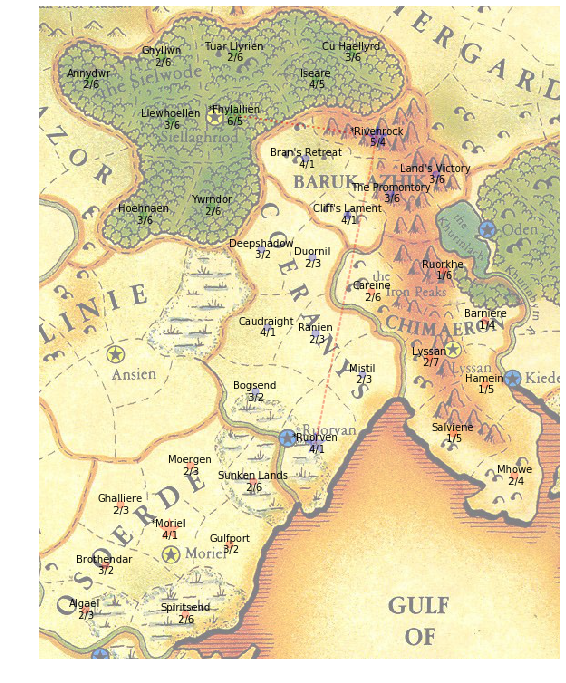

In [3]:
Game.save_world('Birthright')
Game.show_map(caravans=True, regions=['Eastern Marches'])

In [4]:
Game = Regency('Birthright')
Game.show_map(caravans=True, regions=['Eastern Marches'], map_alpha=0.3)

SyntaxError: invalid syntax (<ipython-input-4-baa615163d72>, line 2)